In [2]:
import os 
import sys 

os.getcwd()

'd:\\Burmese-OCR\\src'

In [5]:
os.chdir(r"D:\Burmese-OCR\data\numbers 3.0")
os.getcwd()

'D:\\Burmese-OCR\\data\\numbers 3.0'

In [9]:
import cv2
import matplotlib.pyplot as plt 

image = cv2.imread(os.getcwd() + r"\1045\1.png")
print(image)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


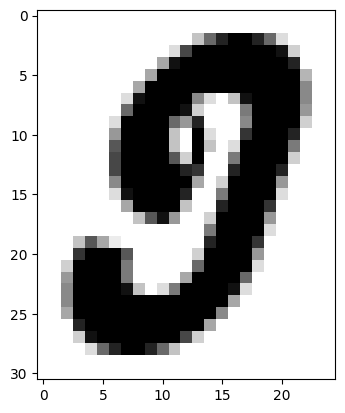

In [10]:
plt.imshow(image)

In [11]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array

image_dir = os.getcwd()
classes = ["1040", "1041","1042","1043","1044","1045","1046","1047","1048",'1049']
data = []
labels = []
for class_ in classes:
  path = os.path.join(image_dir, class_)
  print(class_)
  for image in os.listdir(path):
    image_path = os.path.join(path, image)
    image_ = load_img(image_path, target_size=(224, 224))
    image_ = img_to_array(image_)
    image_ = preprocess_input(image_)

    data.append(image_)
    labels.append(class_)

1040
1041
1042
1043
1044
1045
1046
1047
1048
1049


In [12]:
from sklearn.preprocessing import LabelBinarizer
import numpy as np

lb = LabelBinarizer()
labels = lb.fit_transform(labels)

data = np.array(data, dtype="float32")
labels = np.array(labels)

print(labels.shape)


(1040, 10)


In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(data,labels,test_size=0.2,stratify=labels,random_state=42)
print(x_train.shape)
print(x_test.shape)

(832, 224, 224, 3)
(208, 224, 224, 3)


In [14]:
epochs = 100
batch_size = 32

In [16]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tensorflow.keras import layers, models, optimizers

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),

    layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(512, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax")
])

model.summary()

d:\anaconda3\envs\langchain\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    25,690,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,088,138 (99.52 MB)

 Trainable params: 26,086,154 (99.51 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [17]:
model.compile(loss="binary_crossentropy", optimizer='adam',
	metrics=["accuracy"])

In [ ]:
model_train = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 105s 4s/step - accuracy: 0.5769 - loss: 0.7923
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 118s 5s/step - accuracy: 0.9494 - loss: 0.4747
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 132s 5s/step - accuracy: 0.9792 - loss: 0.3268
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 106s 4s/step - accuracy: 0.9866 - loss: 0.1960
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 114s 4s/step - accuracy: 0.9961 - loss: 0.1002
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 114s 4s/step - accuracy: 0.9972 - loss: 0.0549
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 93s 4s/step - accuracy: 1.0000 - loss: 0.0376
Epoch 8/100
19/26 ━━━━━━━━━━━━━━━━━━━━ 34s 5s/step - accuracy: 0.9985 - loss: 0.0228

In [ ]:
loss , accuracy = model.evaluate(x_test,y_test)
print("loss: ", loss)
print("accuracy: ", accuracy)

In [ ]:
model.save("CNN.h5")